# Travail pratique 3
*INF600F - Traitement d'images (H2022, UQÀM)*


## Identification

- Nom : Jacob-Simard
- Prénom : Raphaël
- Code permanent : JACR26038907
- Cours : INF600f - H2022
- Équipe : 9



In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import tp3
import math
from skimage import filters

# Importation des modules pertinents ici.
# Assurez-vous d'inclure toute autre fonction que vous
# jugez nécessaires ici

# Exercice 1 : Bruit expornentiel

In [2]:
im_ex1 = imageio.imread("tp3_ex1.tiff")

On sélectionne deux zone uniformes pour pouvoir estimer le bruit.

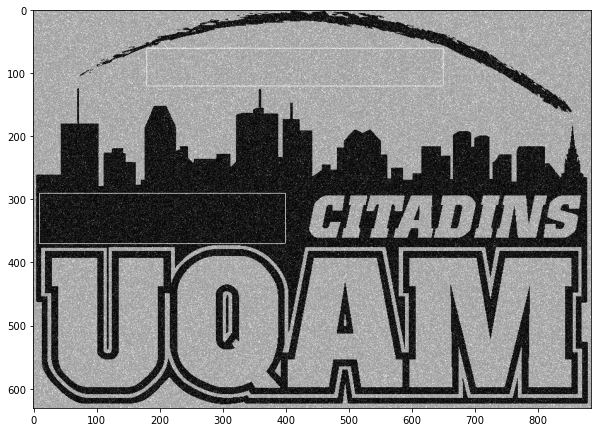

In [3]:
sample_1 = im_ex1[60:120, 180:650]
sample_2 = im_ex1[290:370, 10:400]

# encadrement de l'échantillon 1
ex1_sample = im_ex1.copy()

ex1_sample[60:120, 180] = 255
ex1_sample[60:120, 650] = 255
ex1_sample[60, 180: 650] = 255
ex1_sample[120 ,180:650] = 255

# encadrement de l'échantillon 2
ex1_sample[290:370, 10] = 255
ex1_sample[290:370, 400] = 255
ex1_sample[290, 10:400] = 255
ex1_sample[370, 10:400] = 255


plt.figure(figsize=(10,10))
plt.imshow(ex1_sample, cmap="gray")
plt.show()



On affiche les histogrammes des différents échantillons et de l'image originale.

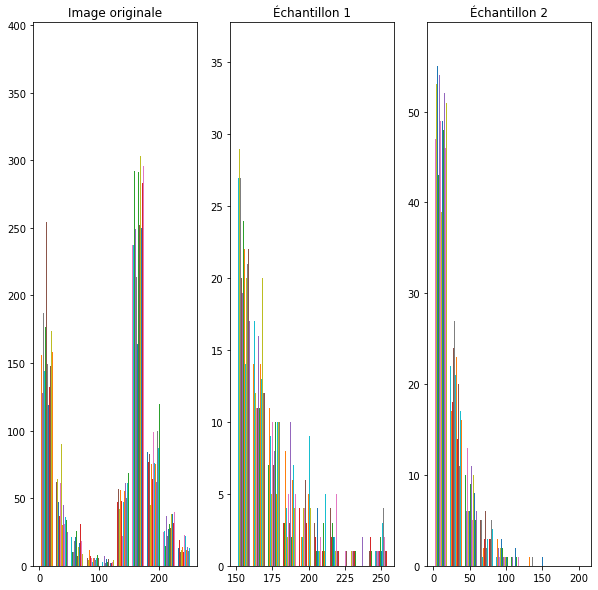

In [4]:
plt.figure(figsize=(10,10))


# image originale
plt.subplot(131)
plt.title("Image originale")
plt.hist(im_ex1)

# échantillon 1
plt.subplot(132)
plt.title("Échantillon 1")
plt.hist(sample_1)

# échantillon 2
plt.subplot(133)
plt.title("Échantillon 2")
plt.hist(sample_2)

plt.show()

On calcule la moyenne, la variance et l'écart type des deux échantillons. Ces mesures seront utiles pour calculer la valeur de `a` pour le bruit exponentiel.

In [5]:

# Estime la moyenne à partir de l'histogramme d'une image.
def estimation_moyenne(sample: dict, nbr_pixel:int) -> float:
    moy = 0.0
    for valeur in sample:
        moy += valeur * (sample[valeur] / nbr_pixel)
    return moy
    

# Estime la variance à partir de l'histogramme d'une image
def estimation_variance(sample:dict, moy:float, nbr_pixel:int)-> float:
    var = 0.0
    for valeur in sample:
        var += (valeur - moy) ** 2 * (sample[valeur] / nbr_pixel)

    return var

In [6]:


# pour l'échantillon 1

# on trouve toutes les valeurs uniques et leurs nombres d'occurences.
k,v = np.unique(sample_1, return_counts=True)
val_uniques = dict(zip(k,v))
nbr_pixel = sample_1.shape[0] * sample_1.shape[1]

s1_moy_e = estimation_moyenne(val_uniques, nbr_pixel)
print(f"Moyenne de l'échantillon 1 : {s1_moy_e}")

s1_std_e = estimation_variance(val_uniques, s1_moy_e, nbr_pixel)
print(f"Variance de l'échantillon 1 : {s1_std_e}")

s1_et_e = math.sqrt(s1_std_e)
print(f"Écart-type de l'échantillon 1 : {s1_et_e}")



Moyenne de l'échantillon 1 : 172.89620567375889
Variance de l'échantillon 1 : 508.39791468110286
Écart-type de l'échantillon 1 : 22.547680915808236


In [7]:
# pour l'échantillon 2

# on trouve toutes les valeurs uniques et leurs nombres d'occurences.
k,v = np.unique(sample_2, return_counts=True)
val_uniques = dict(zip(k,v))
nbr_pixel = sample_2.shape[0] * sample_2.shape[1]

s2_moy_e = estimation_moyenne(val_uniques, nbr_pixel)
print(f"Moyenne de l'échantillon 2 : {s2_moy_e}")

s2_std_e = estimation_variance(val_uniques,s2_moy_e, nbr_pixel)
print(f"Variance de l'échantillon 2 : {s2_std_e}")

s2_et_e = math.sqrt(s2_std_e)
print(f"Écart-type de l'échantillon 2 : {s2_et_e}")


Moyenne de l'échantillon 2 : 23.1363141025641
Variance de l'échantillon 2 : 551.1375402603136
Écart-type de l'échantillon 2 : 23.476318711849043


À partir de ces mesures, on peut calculer `a`.

Pour du bruit exponentiel, peut utiliser les formules suivantes: `z_bar = 1 / a`, `variance = 1 / a^2`. Il faut donc isoler `a` dans ces formules.

Pour l'échantillon 1 :
- Avec la moyenne
>172.9 = 1 / a
>
>a = 1 / 172.0
>
>a = 0.005
- Avec la variance
>508.4 = 1 / a^2
>
>a^2 = 1 / 508.4 
>
>a = 1 / 22.5
>
>a = 0.04

Pour l'échantillon 2 :
- Avec la moyenne
>23.14 = 1 / a
>
>a = 1 / 23.14
>
>a = 0.04
- Avec la variance
>551.14 = 1 / a^2
>
>a^2 = 1 / 551.14
>
>a = 1 / 23.5
>
>a = 0.04

On peut donc voir que `a = 0.04`.

# Exercice 2 : Télescope spatial James-Webb

In [8]:
# Initialisation du télescope
telescope = tp3.JamesWebbSimulator('JACR26038907')

# Importation de l'image de l'étoile HD85506 pour la calibration
im_ex2 = imageio.imread('tp3_ex2.tiff')

In [9]:
# Algorithme de calibration à compléter
def calibration(telescope: tp3.JamesWebbSimulator, image: np.ndarray) -> tp3.JamesWebbSimulator:
    """ Calibration du télescope.
    Parameters
    ----------
    telescope: tp3.JamesWebbSimulator
        Télescope à calibrer
    image: np.ndarray
        Image à utiliser pour la calibration (étoile isolée HD84406)
    Returns
    -------
    telescope: tp3.JamesWebbSimulator
        Télescope calibré    
    """
    ## Pour chaque miroir de votre télescope (`telescope.nb_mirrors`)

    for i in range(telescope.nb_mirrors):
        # TODO: Capture d'une image `im1` de l'étoile `HD84406`
        # TODO: Déplacer le miroir d'une distance de -100 pixels.
        # TODO: Capture d'une image `im2` de l'étoile `HD84406`
        # TODO: Comparaison différentielle des images `im_d = im1 - im2` pour déterminer quelle étoile est associée à ce miroir
        # TODO: Segmentation de `im_d` et calcul de la position moyenne de l'étoile pour ce miroir.
        # TODO: Calcul de la correction à appliquer à ce miroir pour le placer au centre du champ de vue.

        im1 = telescope.simulate(image)   
        telescope.move_mirror_by(i, -100)
        im2 = telescope.simulate(image)

        # Application d'un filtre gaussien pour éliminer le bruit
        diff = im1 - im2
        diff = filters.gaussian(diff, 2)

        # Calcul et application du seuil Otsu
        otsu = filters.threshold_multiotsu(diff, 3)
        old_star = diff > otsu[1]
        new_star = diff <= otsu[0]
        seg1 = diff * old_star
        seg2 = diff * new_star

        # Calcul d'un point représentatif.
        x_max, y_max = np.where(seg1 == seg1.max())
        x_min, y_min = np.where(seg2 == seg2.min())

        # moyenne de la distance de manhattan entre le point et le centre.
        centre_x, centre_y = (seg1.shape[0] // 2, seg1.shape[1] // 2)

        # Calcul des distances entre le centre et les deux points représentants les étoiles
        distance_centre_new = ((x_min - centre_x) ** 2 + (y_min - centre_y) ** 2) ** 0.5 
        distance_old_new = ((x_min - x_max) ** 2 + (y_min - y_max) ** 2) ** 0.5
                
        #Calcul de la différence entre l'estimation et le centre.
        distance = -(distance_old_new - distance_centre_new)

        # On remet le mirroir à sa position originale.
        telescope.move_mirror_by(i, 100)

        # Application de la correction calculée
        telescope.set_mirror_correction(i, distance)

    # TODO: Appliquer la correction pour chaque miroir
    
       
    return telescope

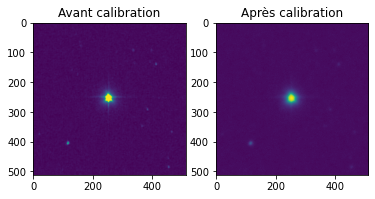

In [10]:
# Calibration du télescope
calibration(telescope, im_ex2)

# Affichage de la comparaison avant/après
plt.subplot(121)
plt.title("Avant calibration")
plt.imshow(im_ex2)
plt.subplot(122)
plt.title("Après calibration")
plt.imshow(telescope.simulate(im_ex2))
plt.show()

#### Question : Suggérez une façon de calibrer les miroirs, basée sur l’analyse d’image, pour corriger leur focus.

En contrastant les deux images, on peut voir que lors de la prise de photo un certain flou et du bruit ont été ajoutés. On ne voit plus vraiment les étoiles autres que l'étoile principale.

Pour calibrer les miroirs, il faut donc pouvoir identifier quels miroirs sont mal calibrés. Pour ce faire, on pourrait estimer le bruit dans une section de l'arrière-plan et faire une estimation de la dégradation.

On pourrait ensuite tenter une technique de dé-convolution, par exemple Wiener, pour évaluer l'état de l'image 'idéal'.

Avec une cible identifiée, on pourrait soit tenter de calculer la correction à appliquer ou encore effectuer un processus itératif où l'on corrige le positionnement du mirroir d'une certaine manière, on vérifie si l'image obtenue s'est rapprochée de la cible et l'on corrige le miroir à nouveau, ainsi de suite jusqu'à ce qu'on obtient une image en focus.

# Exercice 3 : Segmentation d'une angiographie

In [11]:
im_ex3 = imageio.imread('tp3_ex3.tiff') # Image des vaisseaux sanguins
im_ex3_annotation = imageio.imread('tp3_ex3_annotation.tiff') # Annotation manuelle des vaisseaux sanguins dans une partie de l'image

In [12]:
#Calcule le coéfficient DICE de 'img' en fonction de 'annotation'
def dice(img:np.ndarray, annotation:np.ndarray) -> float:
    pixels_img = len(img[img == 1.0])
    pixels_annotation = len(annotation[annotation == 1.0])
    pixels_tous = img * annotation
    pixels_tous = len(pixels_tous[pixels_tous == 1.0])

    return 2 * pixels_tous / (pixels_img + pixels_annotation)

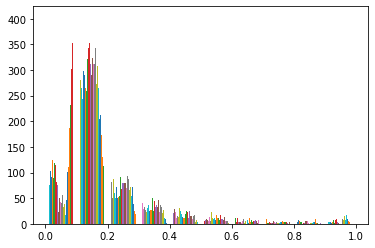

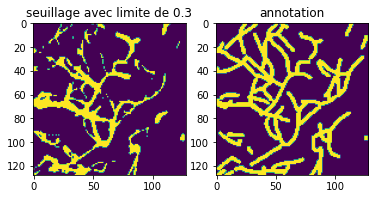

Coefficient DICE avec limite de 0.3 : 0.6442253521126761


In [13]:

# Affichage de l'histogramme de l'image

plt.hist(im_ex3)
plt.show()

# En regardant l'histogramme, 0.3 semble être une bonne valeur limite.

# Sélection de la partie supérieure gauche de l'image pour comparaison avec l'annotation
im_anno = im_ex3[:128, :128]
# on copie l'annotation pour permettre la réutilisation
anno_manuel = im_anno.copy()

# Seuillage manuel avec 0.3 comme limite
lim = 0.3
anno_manuel[anno_manuel <= lim] = 0
anno_manuel[anno_manuel > lim] = 1



# Affichage du résultat pour comparaison
plt.subplot(121)
plt.title("seuillage avec limite de 0.3")
plt.imshow(anno_manuel)
plt.subplot(122)
plt.title("annotation")
plt.imshow(im_ex3_annotation)
plt.show()


# Calcul du coefficient DICE
dice_manuel = dice(anno_manuel, im_ex3_annotation)
print(f"Coefficient DICE avec limite de 0.3 : {dice_manuel}")



On peut faire mieux que 64%...

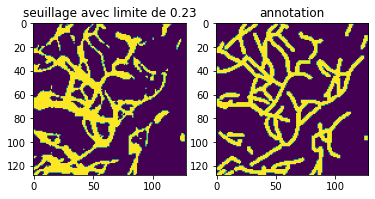

Coefficient DICE avec limite de 0.23 : 0.7401448109412712


In [14]:

# on copie l'annotation pour permettre la réutilisation
anno_manuel = im_anno.copy()

# Seuillage manuel avec 0.23 comme limite
lim = 0.23
anno_manuel[anno_manuel <= lim] = 0
anno_manuel[anno_manuel > lim] = 1

# Affichage du résultat pour comparaison
plt.subplot(121)
plt.title("seuillage avec limite de 0.23")
plt.imshow(anno_manuel)
plt.subplot(122)
plt.title("annotation")
plt.imshow(im_ex3_annotation)
plt.show()


# Calcul du coefficient DICE
dice_manuel = dice(anno_manuel, im_ex3_annotation)
print(f"Coefficient DICE avec limite de 0.23 : {dice_manuel}")

On peut maintenant utiliser les méthodes de seuillage automatique.

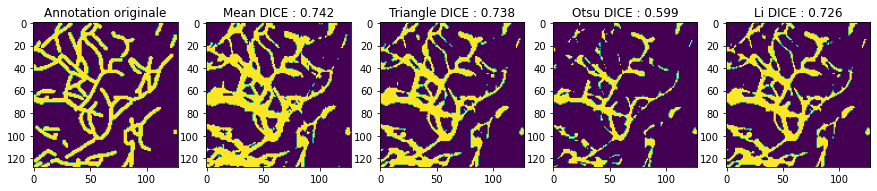

In [15]:
# Copies pour seuillage
mean_anno = im_anno.copy()
triangle_anno = im_anno.copy()
otsu_anno = im_anno.copy()
li_anno = im_anno.copy()

# Seuillages des images
mean_anno = mean_anno > filters.threshold_mean(mean_anno)
triangle_anno = triangle_anno > filters.threshold_triangle(triangle_anno)
otsu_anno = otsu_anno > filters.threshold_otsu(otsu_anno)
li_anno = li_anno > filters.threshold_li(li_anno)

# Calcul des coefficients DICE
dice_mean = dice(mean_anno, im_ex3_annotation)
dice_triangle = dice(triangle_anno, im_ex3_annotation)
dice_otsu = dice(otsu_anno, im_ex3_annotation)
dice_li = dice(li_anno, im_ex3_annotation)

# Affichage
plt.figure(figsize=(15,15))

plt.subplot(151)
plt.imshow(im_ex3_annotation)
plt.title("Annotation originale")
plt.subplot(152)
plt.title(f"Mean DICE : {dice_mean:.3f}")

plt.imshow(mean_anno)
plt.subplot(153)
plt.title(f"Triangle DICE : {dice_triangle:.3f}")

plt.imshow(triangle_anno)
plt.subplot(154)
plt.title(f"Otsu DICE : {dice_otsu:.3f}")

plt.imshow(otsu_anno)
plt.subplot(155)
plt.title(f"Li DICE : {dice_li:.3f}")

plt.imshow(li_anno)
plt.show()


#### Question : Selon vous, quels avantages et limitations y a-t-il à utiliser un seuillage global déterminé automatiquement pour segmenter la microvasculature?

- avantages
    1. Facile à implémenter : Les fonctions sont faciles à utiliser pour les cas de base.
    2. Donne un résultat satisfaisant dans la majorité des cas.
- limitations
    1. Fonctionne mal quand la distribution est étrange : certaines fonctions s'attendent à une certaine distribution et fonctionne mal lorsque ces attentes ne sont pas atteintes.
    2. L'aisance d'usage disparait quand la distribution n'est pas claire : Plus la distribution est complexe, plus les fonctions deviennent difficiles à utiliser.
    3. Prends mal en compte les distances : la segmentation n'est pas parfaite puisque certains éléments faisant partie de la même classe sont plus loin de l'objectif et donc de plus faible intensité.

Il faudrait probablement faire plusieurs segmentations pour bien définir les classes à cause de la distance des différents éléments.
    